## Importing Packages

In [1]:
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
import numpy as np
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import os
from keras.models import load_model

## Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## Exploring the data

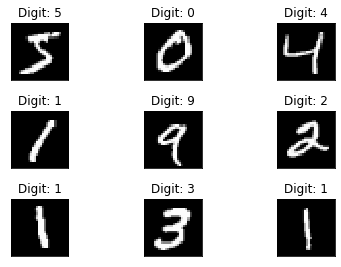

In [3]:
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])

In [4]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [5]:
## Graphing the distribution of the pixel values

Text(0.5, 1.0, 'Pixel Value Distribution')

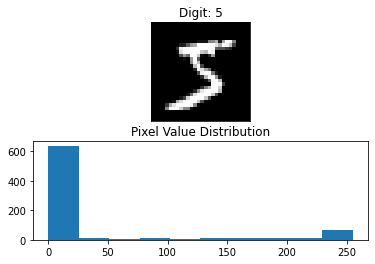

In [6]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")

In [7]:
## Reshaping the input

In [8]:
# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [9]:
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))


In [10]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = to_categorical(y_train, n_classes)
Y_test = to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


## Building the network

In [11]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(10))
model.add(Activation('softmax'))

In [12]:
# # define cnn model
# def define_model():
#     model = Sequential()
#     model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
#     model.add(MaxPooling2D((2, 2)))
#     model.add(Flatten())
#     model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
#     model.add(Dense(10, activation='softmax'))
#     # compile model
#     opt = SGD(learning_rate=0.01, momentum=0.9)
#     model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

In [13]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Epoch 1/20
469/469 - 5s - loss: 0.2487 - accuracy: 0.9255 - val_loss: 0.1177 - val_accuracy: 0.9643 - 5s/epoch - 10ms/step
Epoch 2/20
469/469 - 5s - loss: 0.1005 - accuracy: 0.9687 - val_loss: 0.0805 - val_accuracy: 0.9741 - 5s/epoch - 10ms/step
Epoch 3/20
469/469 - 5s - loss: 0.0713 - accuracy: 0.9779 - val_loss: 0.0721 - val_accuracy: 0.9764 - 5s/epoch - 10ms/step
Epoch 4/20
469/469 - 4s - loss: 0.0569 - accuracy: 0.9814 - val_loss: 0.0623 - val_accuracy: 0.9802 - 4s/epoch - 9ms/step
Epoch 5/20
469/469 - 4s - loss: 0.0448 - accuracy: 0.9852 - val_loss: 0.0738 - val_accuracy: 0.9770 - 4s/epoch - 9ms/step
Epoch 6/20
469/469 - 4s - loss: 0.0380 - accuracy: 0.9876 - val_loss: 0.0729 - val_accuracy: 0.9786 - 4s/epoch - 9ms/step
Epoch 7/20
469/469 - 4s - loss: 0.0333 - accuracy: 0.9885 - val_loss: 0.0732 - val_accuracy: 0.9800 - 4s/epoch - 10ms/step
Epoch 8/20
469/469 - 4s - loss: 0.0302 - accuracy: 0.9900 - val_loss: 0.0629 - val_accuracy: 0.9818 - 4s/epoch - 8ms/step
Epoch 9/20
469/469 -

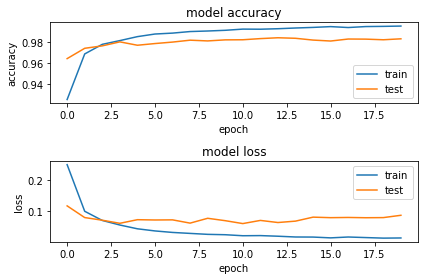

In [14]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "results/"
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

In [15]:
mnist_model = load_model("results/keras_mnist.h5")
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

313/313 - 1s - loss: 0.0878 - accuracy: 0.9831 - 621ms/epoch - 2ms/step
Test Loss 0.08777430653572083
Test Accuracy 0.9830999970436096


313/313 [==============================] - 1s 2ms/step

9831  classified correctly
169  classified incorrectly


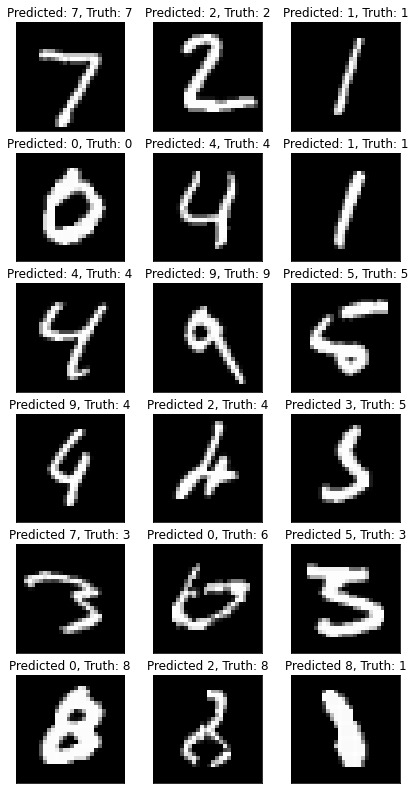

In [16]:
# load the model and create predictions on the test set
mnist_model = load_model("results/keras_mnist.h5")
predicted_probs = mnist_model.predict(X_test)
predicted_classes = np.argmax(predicted_probs, axis=1)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted: {}, Truth: {}".format(predicted_classes[correct], y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Truth: {}".format(predicted_classes[incorrect],y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])
